In [86]:
from forch import nn
import numpy as np
import forch
import forch.utils
import forch.utils.data
import forch.optim
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    
    def backward(self, d_out):
        d_out = self.sigmoid.backward(d_out)
        d_out = self.fc3.backward(d_out)
        d_out = self.relu.backward(d_out)
        d_out = self.fc2.backward(d_out)
        d_out = self.relu.backward(d_out)
        d_out = self.fc1.backward(d_out)
        return d_out

In [88]:
features = np.random.rand(200_000, 2)  
labels = (features[:, 0] + features[:, 1] < 1).astype(float).reshape(-1, 1)

test_features = np.random.rand(20_000, 2)  
test_labels = (test_features[:, 0] + test_features[:, 1] < 1).astype(float).reshape(-1, 1)

In [89]:
dataset = forch.utils.data.Dataset(features, labels)
test_dataset = forch.utils.data.Dataset(test_features, test_labels)

In [90]:
dataloader = forch.utils.data.DataLoader(dataset, 5000)
test_dataloader = forch.utils.data.DataLoader(test_dataset, 5000)

In [91]:
from tqdm import tqdm

In [92]:
model = Model()
criton = nn.MSELoss()
optim = forch.optim.SGD([model.fc1.W, model.fc2.W, model.fc3.W], lr=1e-4)

losses = []

for epoch in tqdm(range(200)):
    running_loss = 0
    for features, labels in dataloader:
        predicted = model(features)
        optim.zero_grad()
        loss = criton.forward(predicted, labels) # TODO: make forward unnecessary
        running_loss += loss
        d_loss = criton.backward()
        model.backward(d_loss)
        optim.step()
    losses.append(running_loss / len(dataloader))

100%|██████████| 200/200 [01:13<00:00,  2.72it/s]


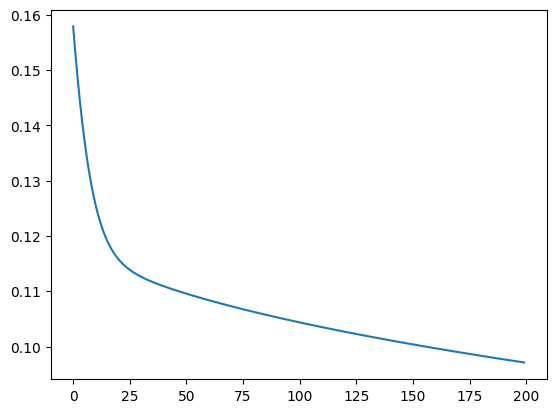

In [93]:
plt.plot(losses)

In [99]:
total = 0
correct = 0
for features, labels in test_dataloader:
    predicted = model(features)
    predicted = (predicted > 0.5).astype(int)
    total += len(predicted)
    correct += (predicted == labels).sum()
acc = correct / total
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 90.81%
